# Building a deep learning model to classify the mnist digits dataset with Batch Normalization.

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization

In [2]:
batch_size=128
num_classes=10
epochs=20


# Load and preprocess the MNIST dataset

In [3]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
print('Shape-x:\t',xtrain.shape)
print('Shape-y:\t',ytrain.shape)


Shape-x:	 (60000, 28, 28)
Shape-y:	 (60000,)


In [4]:
xtrain=xtrain.reshape(60000,784)
xtest=xtest.reshape(10000,784)
print('Shape-x-train:\t',xtrain.shape)
print('Shape-x-Test:\t',xtest.shape)


Shape-x-train:	 (60000, 784)
Shape-x-Test:	 (10000, 784)


In [5]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')


In [6]:
import keras
ytrain=keras.utils.to_categorical(ytrain)
ytest=keras.utils.to_categorical(ytest)

# Sequential Model

In [7]:
model=Sequential()
model.add(Dense(128,kernel_initializer="he_uniform",activation='relu',input_shape=(784,)))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu',kernel_initializer="he_uniform"))
model.add(BatchNormalization())
model.add(Dense(num_classes,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 110154 (430.29 KB)
Trainable params: 10977

# Model Compilation and Fitting

In [8]:
model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=0.01,momentum=0.9),metrics=['accuracy'])

In [9]:
history=model.fit(xtrain,ytrain,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_data=(xtest,ytest))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3002 - accuracy: 0.9111 - val_loss: 0.1536 - val_accuracy: 0.9536
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1250 - accuracy: 0.9638 - val_loss: 0.1135 - val_accuracy: 0.9644
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.9730 - val_loss: 0.1008 - val_accuracy: 0.9684
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0701 - accuracy: 0.9794 - val_loss: 0.0904 - val_accuracy: 0.9713
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0572 - accuracy: 0.9833 - val_loss: 0.0835 - val_accuracy: 0.9734
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0463 - accuracy: 0.9863 - val_loss: 0.0797 - val_accuracy: 0.9746
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0385 - accuracy: 0.9887 - val_loss: 0.0801 - val_accuracy: 0.9745
Epoch 

# Evaluate the model

In [11]:
_, train_acc_mnist = model.evaluate(xtrain, ytrain, verbose=1)
_, test_acc_mnist = model.evaluate(xtest, ytest, verbose=1)
print('\n\nTrain Accuracy:\t', train_acc_mnist)
print('\n\nTest Accuracy:\t', test_acc_mnist)

313/313 [==============================] - 0s 1ms/step - loss: 0.0818 - accuracy: 0.9783


Train Accuracy:	 0.9997333288192749


Test Accuracy:	 0.9782999753952026


# Plot training history

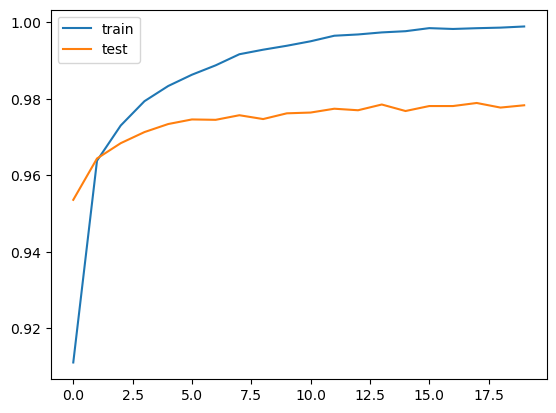

In [12]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

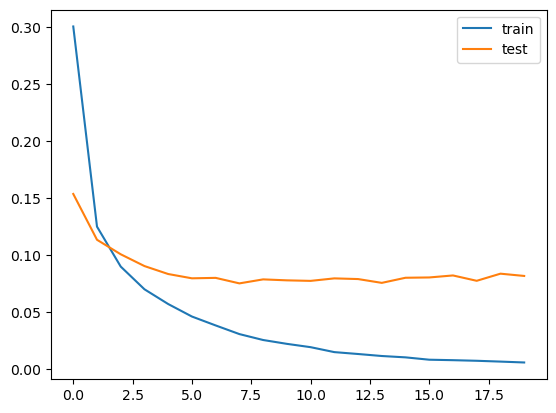

In [13]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()